In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment

In [2]:
data=pd.read_excel('iris (3).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [6]:
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data[['Classification']]

,Classification
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [12]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [13]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)


In [14]:
#logistic regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size= 0.2)
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test, y_pred,average='weighted'))
print('Recall is:', recall_score(y_test, y_pred,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [16]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [17]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

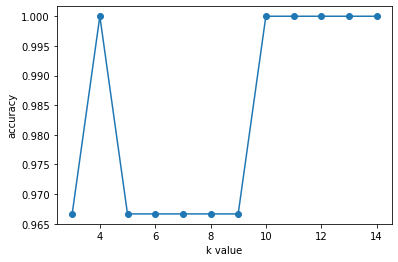

In [18]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [19]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [20]:
print('Accuracy is:', accuracy_score(y_test, y_pred))
print('Precision is:', precision_score(y_test, y_pred,average='weighted'))
print('Recall is:', recall_score(y_test, y_pred,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred,average='weighted'))

Accuracy is: 0.9666666666666667
Precision is: 0.9694444444444444
Recall is: 0.9666666666666667
F1 score is: 0.9664109121909632


In [21]:
#SVM model
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [22]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test, y_pred,average='weighted'))
print('Recall is:', recall_score(y_test, y_pred,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [23]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

In [24]:
print('Accuracy is:',accuracy_score(y_test,y_pred))
print('Precision is:', precision_score(y_test, y_pred,average='weighted'))
print('Recall is:', recall_score(y_test, y_pred,average='weighted'))
print('F1 score is:', f1_score(y_test, y_pred,average='weighted'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


Logistic regression, SVM model ,Random forest classifier gives the best results so any of them can be used to predict iris species.